<a href="https://colab.research.google.com/github/flashsss/PraktikumPengPola/blob/main/TugasMatstatPCA_G6501231054.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MOUNT ALGORITMA PADA FOLDER TEMPAT DATASET DISIMPAN**

In [1]:
  from google.colab import drive
  drive.mount('/content/gdrive/')
  %cd gdrive/MyDrive/TugasMatstatPCA

Mounted at /content/gdrive/
/content/gdrive/MyDrive/TugasMatstatPCA


# **TUJUAN**

Menggunakan PCA untuk mencari principal component dari face image lalu menggunakannya untuk melakukan face recognition

Nama: I Wayan Fajar Surya Negara

NIM: G6501231054

## **IMPORT LIBRARY YANG AKAN DIGUNAKAN**

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

## **LOAD DATASET YANG DIGUNAKAN**

Setiap orang memiliki 2 test image


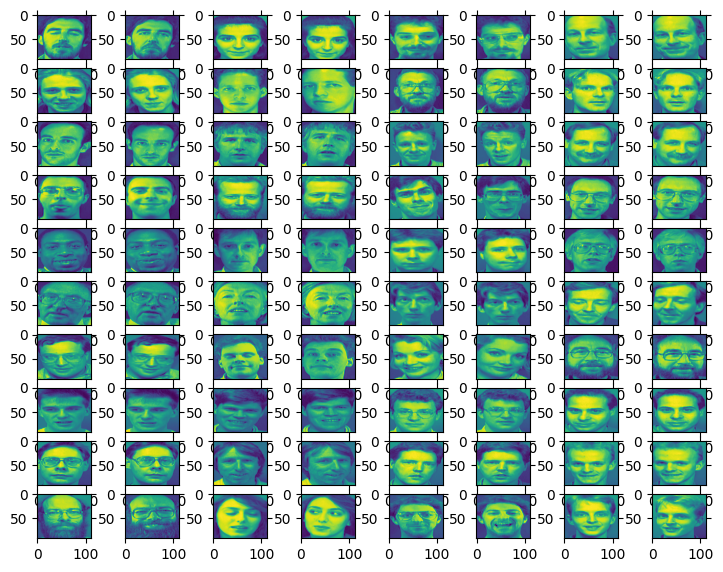

In [3]:
dir = ("ATnT")

xtest_image_data=[]
xtrain_image_data=[]
ytest_image_data=[]
ytrain_image_data=[]
no_of_elm_train=[]
no_of_elm_test=[]
target_name_array=[]
target_name_set={}
image_name_train=[]
image_name_test=[]
t_o=0
for f_name in os.listdir(dir):
    path_f = os.path.join(dir, f_name)
    if os.path.isdir(path_f):
        if len(os.listdir(path_f))>= 8:
            i = 0
            for img_name in os.listdir(path_f):
                img_path = os.path.join(path_f, img_name)
                if(i<8):
                    image_name_train+=[img_path]
                    ytrain_image_data+=[t_o]
                    if(len(no_of_elm_train)>t_o):
                        no_of_elm_train[t_o]+=1
                    else:
                        no_of_elm_train+=[1]
                    if(i==0):
                        target_name_array+=[img_name]
                        target_name_set[t_o]=img_name
                else:
                    image_name_test+=[img_path]
                    ytest_image_data+=[t_o]
                    if(len(no_of_elm_test)>t_o):
                        no_of_elm_test[t_o]+=1
                    else:
                        no_of_elm_test+=[1]
                i=i+1
            t_o=t_o+1
n1=len(image_name_train)
image_name_test
height=112
width=92
size=(height*width)
train_mat=np.zeros((n1,size))
i = 0
for name1 in image_name_train:
    gray = cv2.imread(name1, 0)
    gray = cv2.resize(gray, (height,width))
    mat = np.asmatrix(gray)
    train_mat[i,:] = mat.ravel()

    i=i+1
k=0
n2=len(image_name_test)
test_mat=np.zeros((n2,size))
for name2 in image_name_test:
    gray1 = cv2.imread(name2, 0)
    gray1 = cv2.resize(gray1, (height,width))
    mat1 = np.asmatrix(gray1)
    test_mat[k,:] = mat1.ravel()

    k=k+1

for ii in range(len(test_mat)):
    eig_vecs1 = test_mat[ii,:].reshape(92, 112)
    plt.subplot(10,8,ii+1)
    plt.imshow(eig_vecs1)
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
print("Setiap orang memiliki 2 test image")
plt.show()

# **IMPLEMENTASI ALGORITMA PCA**

In [20]:
"""
Implementasikan PCA dengan menggunakan arugumen berikut:
1. X(images array)
2. Jumlah komponen
Fungsi ini harus mencari eigen vectors (principal components) yang juga akan dikenal sebagai "Eigen faces"
"""
"""
steps
1) Pertama dilakukan normalisasi data dengan menguranginya dengan rata rata setiap kolomnya atau bisa disebut centering
2) Menghitung covariance matrix dari data yang sudah dinormalisasi
3) Tentukan eigenvector dan eigenvalue dari setiap covariance matrix
4) Sorting eigenvalue dari yang terkecil ke terbesar bersamaan dengan eigenvectornya


"""
def principalComponentAnalysis(train_mat, num):
    global cov_mat
    global all_eigne_value
    global col_mean
    global all_eigne_vect2
    col_mean = np.mean(train_mat, axis=0)
    X_temp = train_mat - col_mean
    cov_mat = np.cov(X_temp.T)
    all_eigne_value, all_eigne_vect = np.linalg.eigh(cov_mat)
    sorted_indices = np.argsort(all_eigne_value[::-1])
    all_eigne_vect2 = all_eigne_vect[:, sorted_indices]
    return all_eigne_value, all_eigne_vect2[:, :num]

In [21]:
# Memanggil fungsi PCA
eigenvalues, eigenvectors = principalComponentAnalysis(train_mat, 20)

# Menampilkan eigenvalues
print("Eigenvalues:")
print(eigenvalues)

# Menampilkan eigenvectors
print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[-1.61421587e-09 -1.47801384e-09 -1.01845636e-09 ...  1.10592280e+06
  2.08021799e+06  2.82665521e+06]

Eigenvectors:
[[ 0.00190396 -0.01449973 -0.0211089  ... -0.00746883  0.0054626
  -0.00555482]
 [ 0.00190017 -0.01445566 -0.02117356 ... -0.0073047   0.00448094
  -0.00567963]
 [ 0.00191201 -0.01446403 -0.02106372 ... -0.00703523  0.00387458
  -0.00570056]
 ...
 [ 0.00633126  0.01050739 -0.01175828 ... -0.0194548   0.00391485
  -0.0053826 ]
 [ 0.00621987  0.00963516 -0.01199053 ... -0.01916641  0.00413144
  -0.00528931]
 [ 0.00716566  0.00895112 -0.01242426 ... -0.01753642  0.00435717
  -0.00261531]]


## **PLOT DARI EIGENVECTOR DENGAN EIGENVALUE TERBESAR**

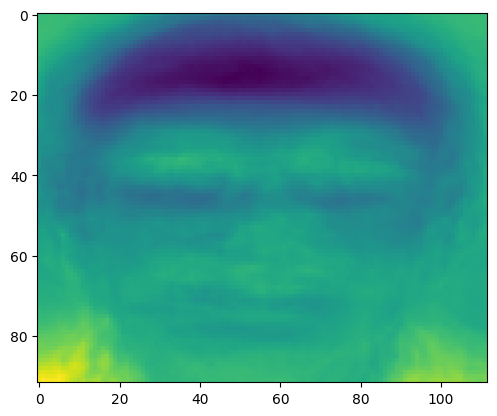

In [22]:
eig_vecs = eigenvectors[:,0].reshape(92, 112)
plt.imshow(eig_vecs)
plt.show()

## **KONTRIBUSI SETIAP PRINCIPAL COMPONENT**

Kontribusi setiap PC adalah:  [ 1.83080810e-01  1.34734506e-01  7.16299752e-02 ... -6.59648248e-17
 -9.57300947e-17 -1.04551821e-16]


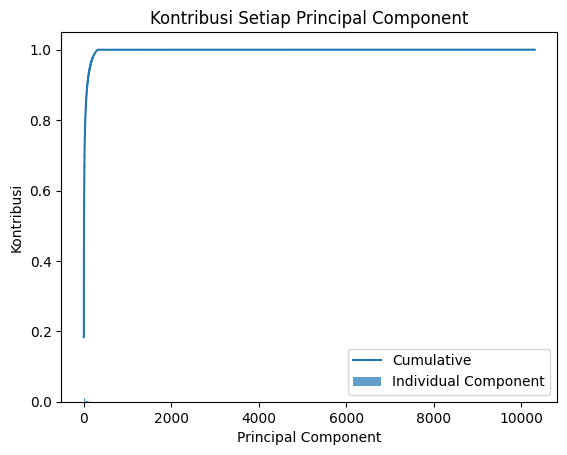

In [46]:
import matplotlib.pyplot as plt

# Mengurutkan eigenvalues secara descending
def sort_descending(arr):
    return sorted(arr, reverse=True)

eigenvalues_sorted = sort_descending(eigenvalues)

# Normalisasi nilai eigen agar jumlahnya menjadi 1
total_eigenvalues = np.sum(eigenvalues_sorted)
normalized_eigenvalues = eigenvalues_sorted / total_eigenvalues
print('Kontribusi setiap PC adalah: ', normalized_eigenvalues)

# Menghitung kumulatif dari nilai eigen yang dinormalisasi
cumulative_normalized_eigenvalues = np.cumsum(normalized_eigenvalues)

# Menampilkan grafik bar kontribusi masing-masing principal component
num_components = len(eigenvalues)
plt.bar(range(1, num_components + 1), normalized_eigenvalues, alpha=0.7, align='center', label='Individual Component')
plt.step(range(1, num_components + 1), cumulative_normalized_eigenvalues, where='mid', label='Cumulative')

plt.xlabel('Principal Component')
plt.ylabel('Kontribusi')
plt.title('Kontribusi Setiap Principal Component')
plt.legend()
plt.show()

In [ ]:
# Mencari indeks kolom yang jumlahnya lebih dari atau sama dengan 0.9
Data = np.where(np.cumsum(normalized_eigenvalues) >= 0.95)[0][0]

print("Jumlah Principal Component yang harus digunakan agar mewakilkan 90% data adalah minimal:", Data, "Principal Component")

## **IMPLEMTASI REKONSTRUKSI CITRA DARI EIGENVEKTOR**

In [29]:
"""
imageReconstruction mengambil 3 nilai sebagai argumen (image,eigenvectormatrix,mean)
"""
def imageReconstruction(img,vect,men):
    temp1=np.dot(img - men, vect)
    temp2=np.dot(temp1, vect.T)
    temp3=temp2+men
    return temp3

## **VISUALISASI REKONSTRUKSI CITRA**

component=5  component=10  component=100  component=1000  component=10304
Label orang ke 0


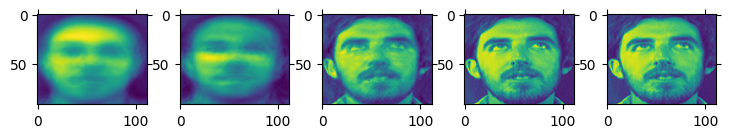

Label orang ke 1


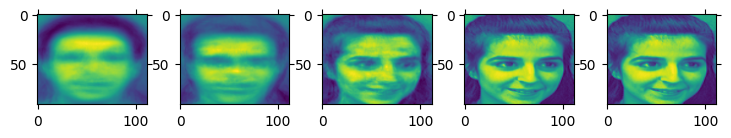

Label orang ke 2


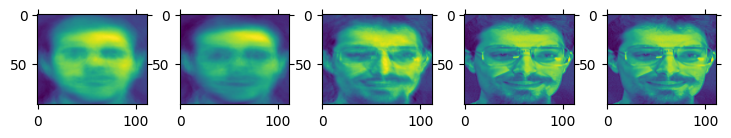

Label orang ke 3


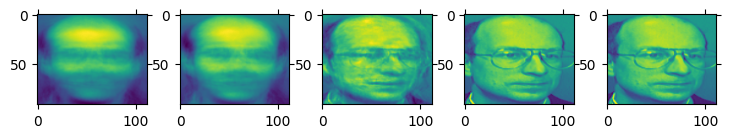

Label orang ke 5


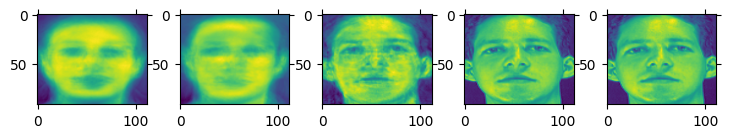

Label orang ke 6


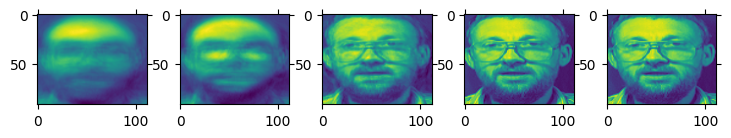

Label orang ke 7


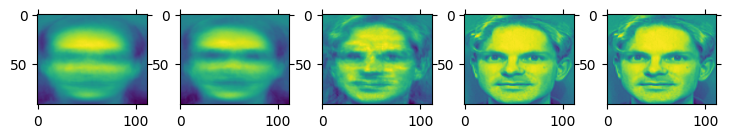

Label orang ke 8


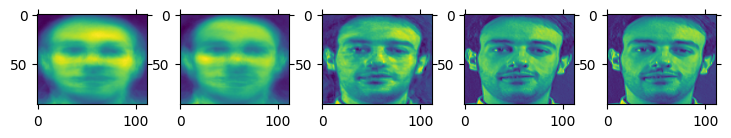

Label orang ke 10


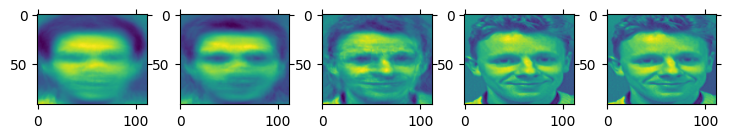

Label orang ke 11


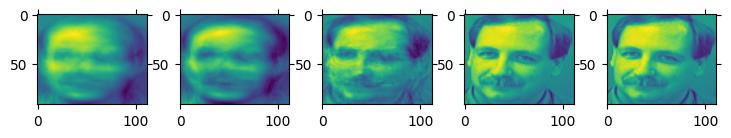

In [32]:
"""
Rekonstruksi akan dilakukan dengan menggunakan 5 PC pertama, 10 PC, 100 PC, 1000PC, dam terakhir semua PC (10304)
"""
print("component=5  component=10  component=100  component=1000  component=10304")
for ji in range(0,100,10):
    po=0
    for i in [5,10,100,1000,10304]:
        vect=all_eigne_vect2[:,:i]
        resultimg=imageReconstruction(train_mat[ji,:].reshape(1,10304),vect,col_mean.reshape(1,10304))
        generatedimg = resultimg.reshape(92, 112)
        plt.subplot(5,5,po+1)
        plt.imshow(generatedimg)
        plt.subplots_adjust(right=1.2, top=1.2)
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
        po=po+1
    print("Label orang ke "+str(ytrain_image_data[ji])+"")
    plt.show()

## **IMPLEMENTASI PCA UNTUK FACE RECOGNITION**

In [33]:
"""
Implement pca dalam fungsi berikut dengan mengambil argumen berikut:
1. Test image
2. Eigenvectors
3. Mean Eigen Face
4. Training Set(X_train,y_train)
The function must return the following:
1. citra dengan error terkecil
2. nilai error
3. prediction class
"""
def model(test_img,train_after_dot_with_eigne,test_after_dot_with_eigne,ytrain_image_data,c):
    distances = np.sqrt(np.sum((train_after_dot_with_eigne - test_img)**2, axis=1))
    nearesr_img = np.argmin(distances)
    error=distances[nearesr_img]

    return nearesr_img,error,ytrain_image_data[nearesr_img]

Accuracy at component5 :  0.875
Accuracy at component10 :  0.975
Accuracy at component100 :  1.0
Accuracy at component1000 :  0.9875
Accuracy at component10304 :  0.9875
  Test Image   predict_Image(5)   predict_Image(10)   predict_Image(100)   predict_Image(1000)   predict_Image(10304)


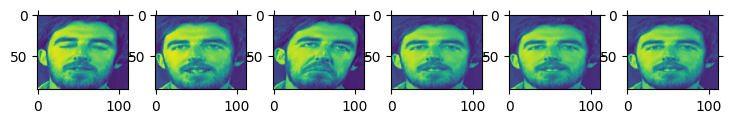

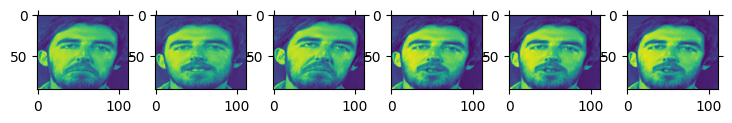

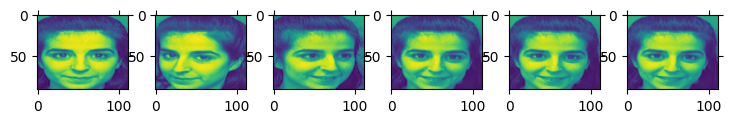

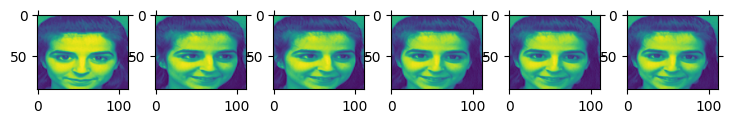

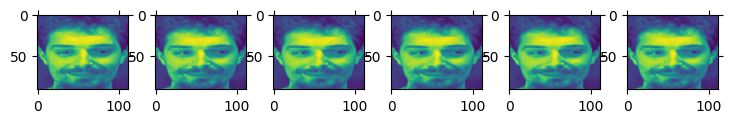

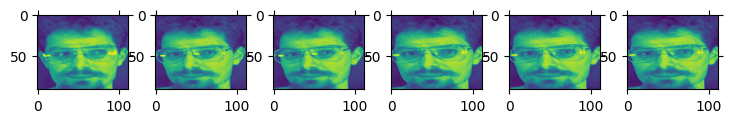

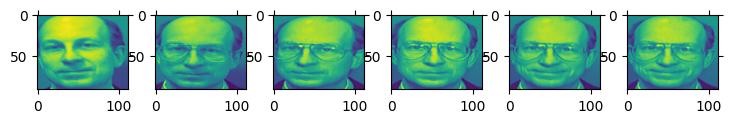

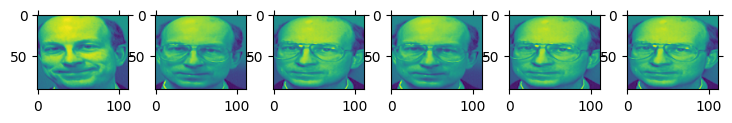

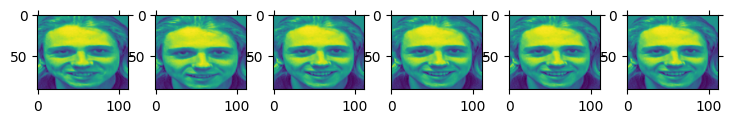

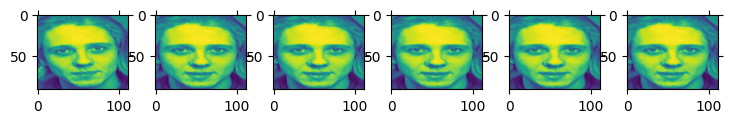

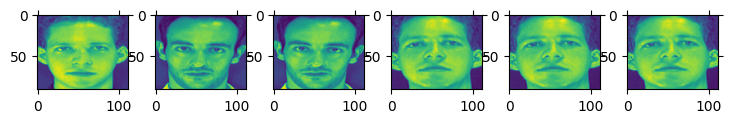

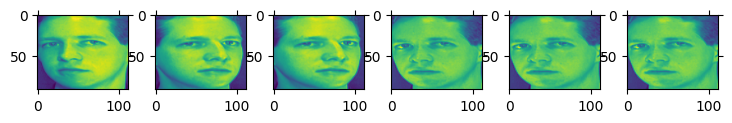

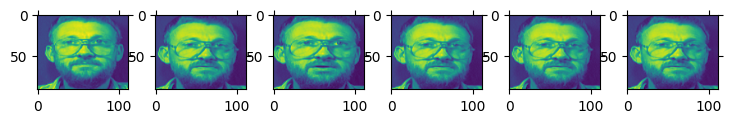

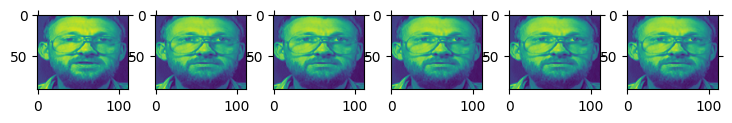

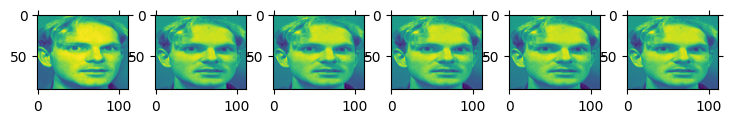

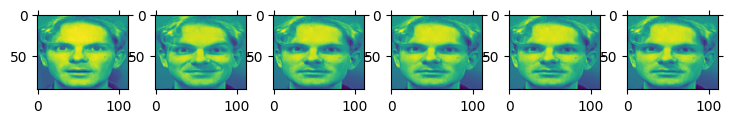

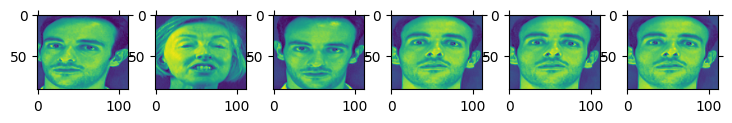

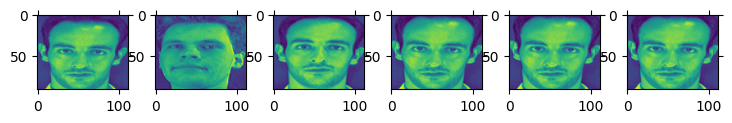

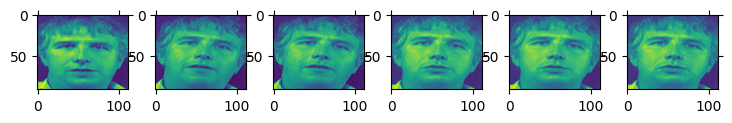

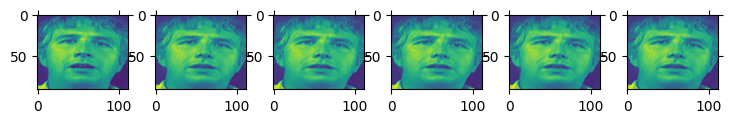

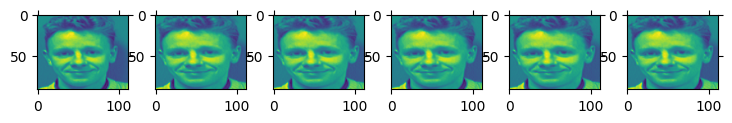

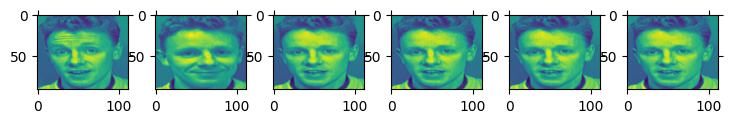

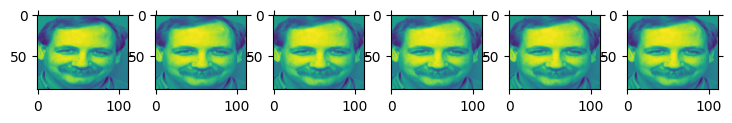

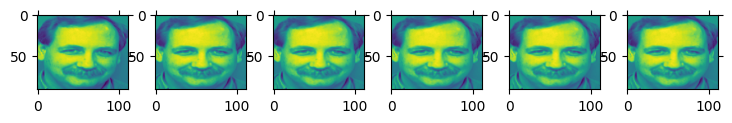

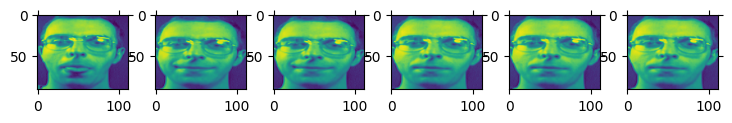

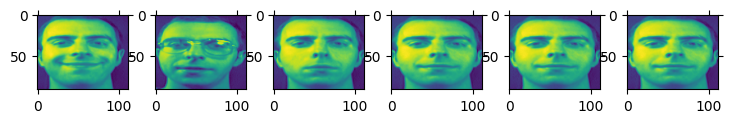

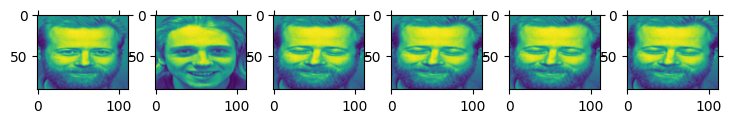

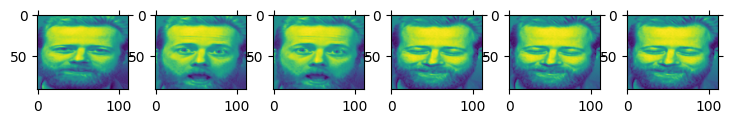

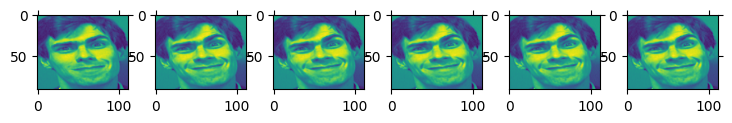

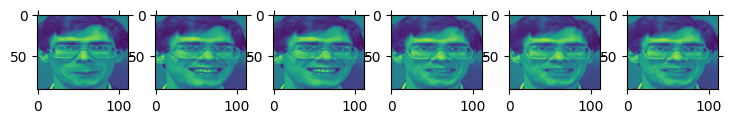

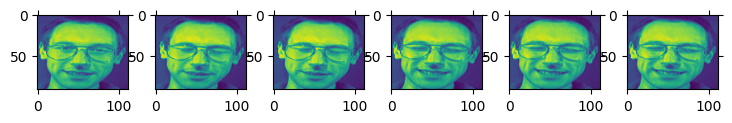

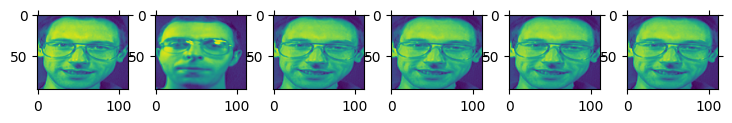

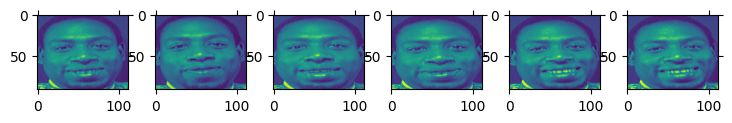

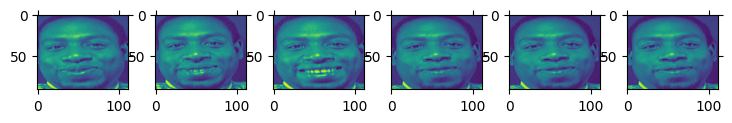

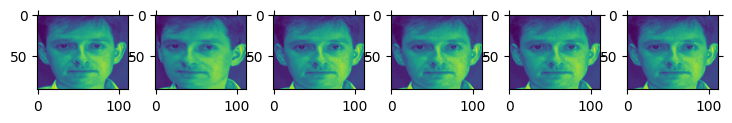

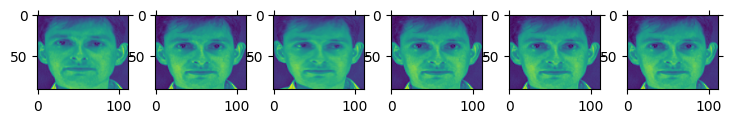

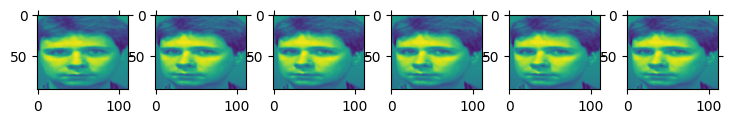

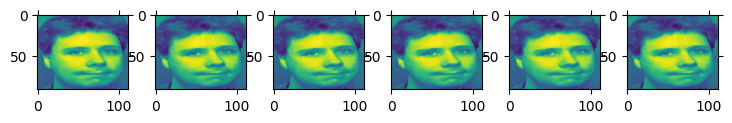

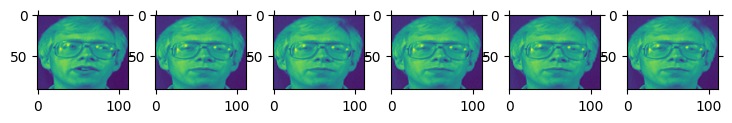

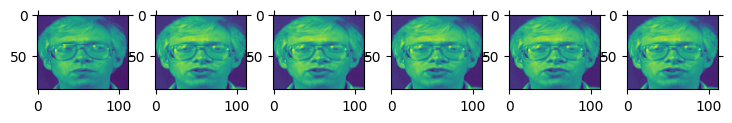

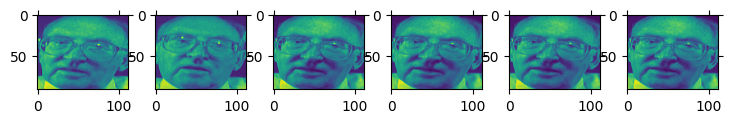

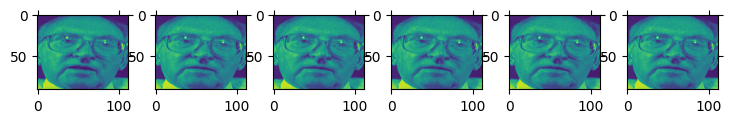

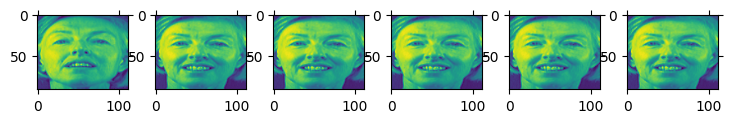

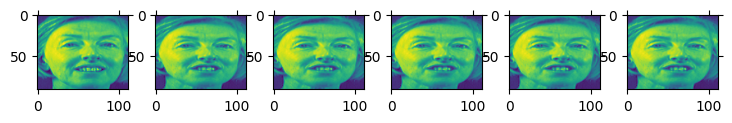

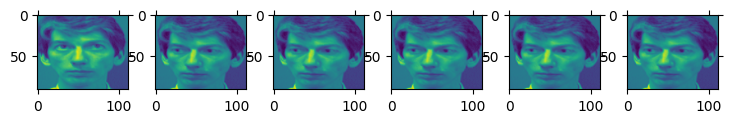

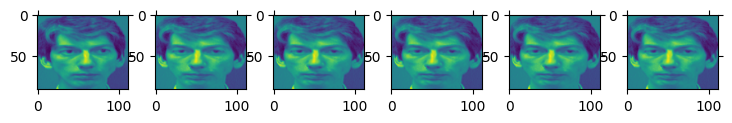

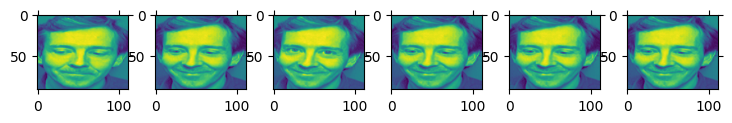

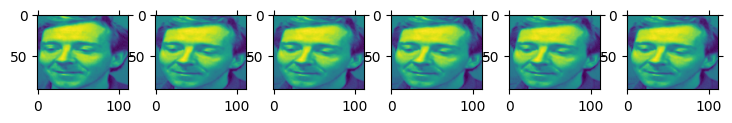

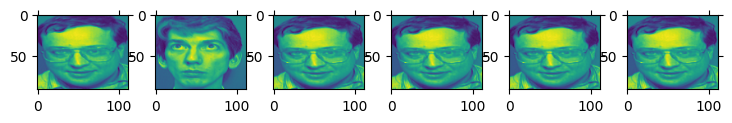

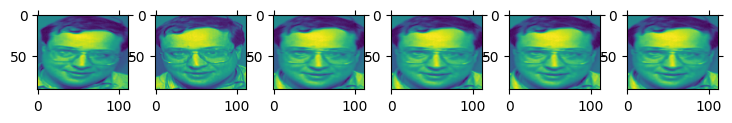

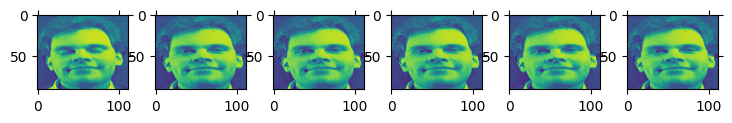

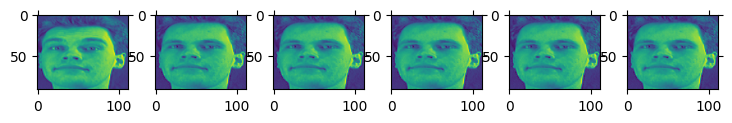

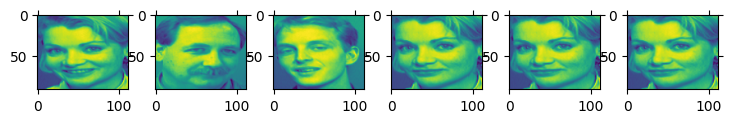

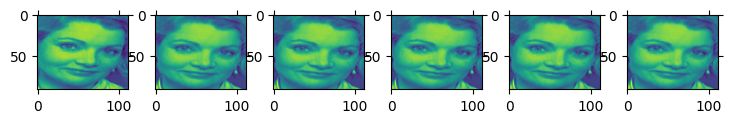

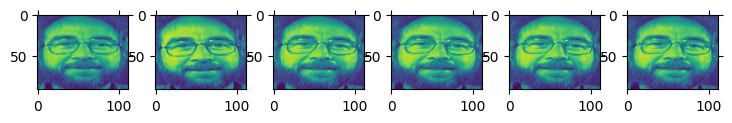

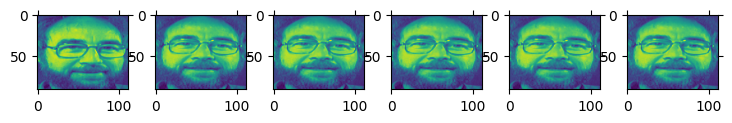

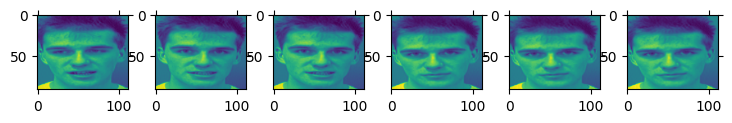

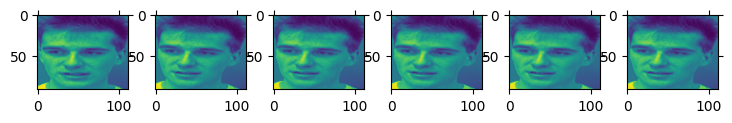

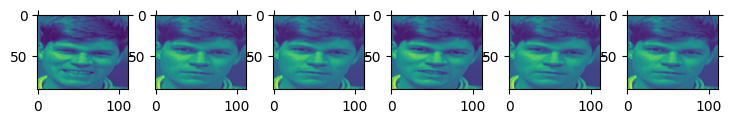

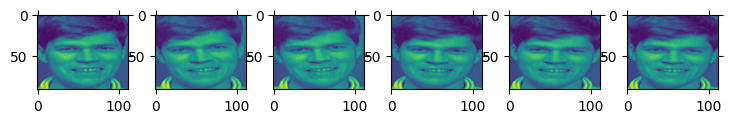

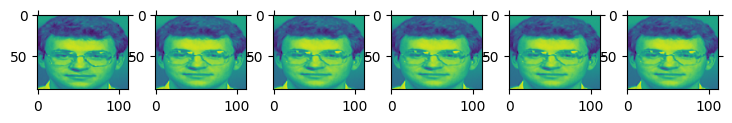

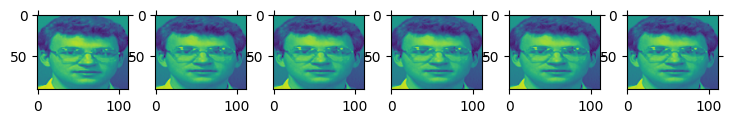

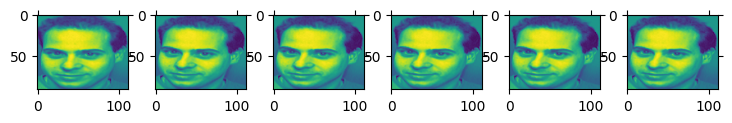

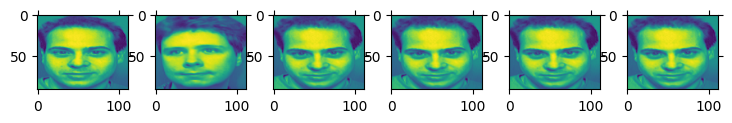

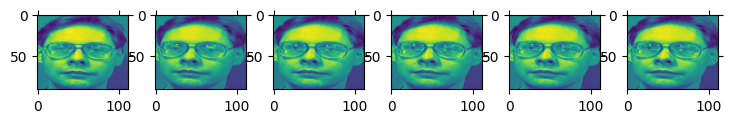

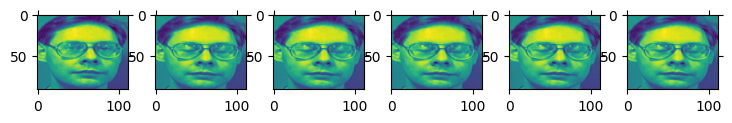

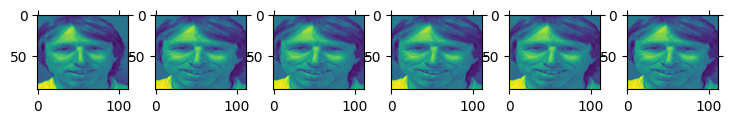

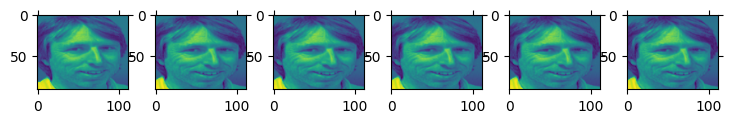

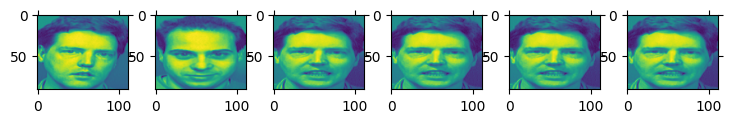

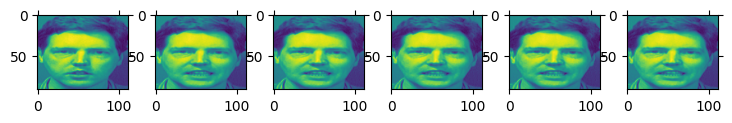

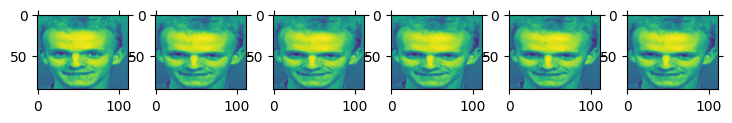

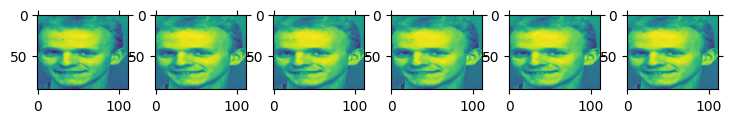

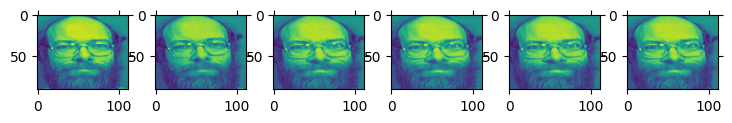

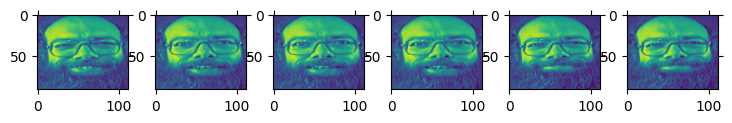

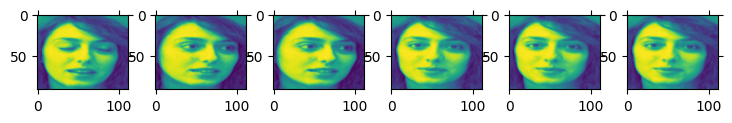

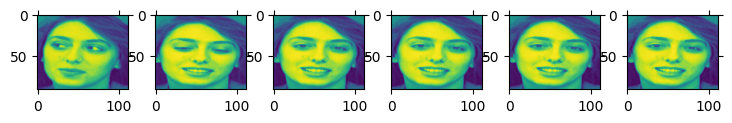

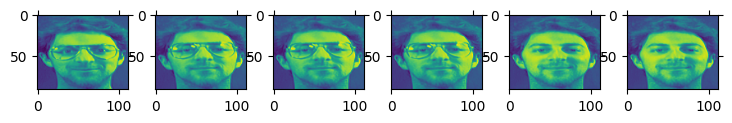

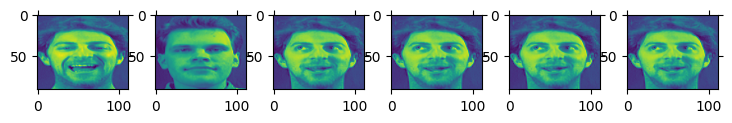

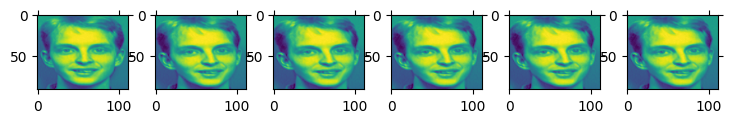

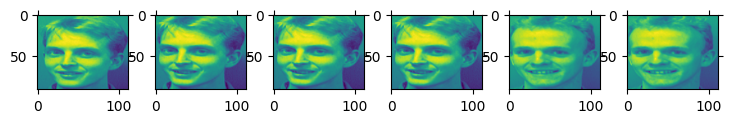

In [37]:
"""
Ulangi semua gambar dalam data pengujian dan
menguji keakuratannya dengan mengambil jumlah komponen yang berbeda
"""
from sklearn.metrics import accuracy_score
empty_array = np.empty((80, 5))
op=0
accr_arr=[]
mse_arr=[]
for comp in [5,10,100,1000,10304]:
    temp_all_vect=all_eigne_vect2[:,:comp]

    train_after_dot_with_eigne=np.dot(train_mat,temp_all_vect)
    test_after_dot_with_eigne=np.dot(test_mat,temp_all_vect)
    io=0
    y_pred=[]
    err_t=[]
    for test_img in test_after_dot_with_eigne:
        img_pred,err,pred=model(test_img,train_after_dot_with_eigne,test_after_dot_with_eigne,ytrain_image_data,comp)
        empty_array[io][op]=img_pred
        y_pred.append(pred)
        io=io+1
        err_t.append(err)
    accr=accuracy_score(ytest_image_data, y_pred)

    accr_arr.append(accr)
    mse=np.sum(err_t)/comp
    mse_arr.append(mse)
    print("Accuracy at component"+str(comp)+" : ", accr)
    op=op+1
empty_array[0][0]
# generatedimg = test_mat[0,:].reshape(92, 112)
# plt.imshow(generatedimg)
# plt.show()
print("  Test Image   predict_Image(5)   predict_Image(10)   predict_Image(100)   predict_Image(1000)   predict_Image(10304)")
for hi in range(len(ytest_image_data)):
    qo=0
    generatedimg = test_mat[hi,:].reshape(92, 112)
    plt.subplot(6,6,qo+1)
    plt.imshow(generatedimg)
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    qo=qo+1
    for bi in range(5):
#         print(int(empty_array[hi][bi]))
        generatedimg = train_mat[int(empty_array[hi][bi]),:].reshape(92, 112)
        plt.subplot(6,6,qo+1)
        plt.imshow(generatedimg)
        plt.subplots_adjust(right=1.2, top=1.2)
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
        qo=qo+1

    plt.show()


## **PLOT AKURASI**

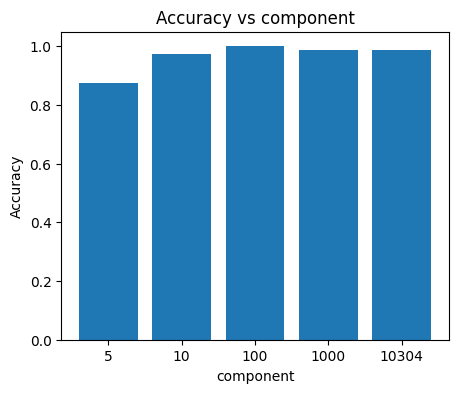

In [38]:
#plot accuracy vs component
fig = plt.figure(figsize =(5,4))
plt.bar(["5","10","100","1000","10304"],accr_arr)

plt.xlabel('component')
plt.ylabel('Accuracy')
plt.title('Accuracy vs component')
plt.show()

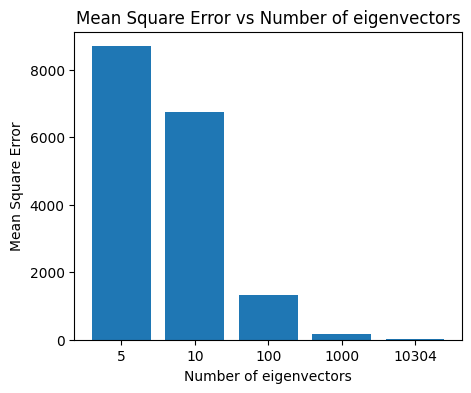

[8688.182493107044,
 6732.779970164968,
 1330.8625536627796,
 164.9915051818972,
 19.019161665392463]

In [39]:
# Plot Number of eigenvectors vs Mean Square Error
fig = plt.figure(figsize =(5,4))
plt.bar(["5","10","100","1000","10304"],mse_arr)

plt.xlabel('Number of eigenvectors')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error vs Number of eigenvectors')
plt.show()
mse_arr